In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# criterion_type can be gini or entropy
def decision_tree(input_address, criterion_type='gini'):

    # read data from excel and convert to numpy array.
    df = pd.read_excel(input_address).values
    # get precent of each columns  that is missed.
    number_of_zeros = np.sum((df[:, :-1] == 0), axis=0) / len(df)
    print('precent of each column that is missed')
    for _ in range(df.shape[1]-1):
        print('column', _+1, number_of_zeros[_])

    # fill missing value by 1 or -1 if number of occurance of 1 is 
    # bigger than -1 we fill with 1 otherwise fill with -1
    # separate data from labels.
    corrected_values = df[:, :-1].tolist()

    # fill missed values.
    for _ in range(df.shape[1]-1):
        number_of_one = np.sum((df[:, _] == 1))
        number_of_mines_one = np.sum((df[:, _] == -1))
        if number_of_one > number_of_mines_one:
            fill_value = 1
        else:
            fill_value = -1

        for r in range(df.shape[0]):
            if corrected_values[r][_] == 0:
                corrected_values[r][_] = fill_value

    x_train, x_test , y_train, y_test = train_test_split(
        corrected_values,
        df[:, -1],
        test_size=.2
    )
    clf = tree.DecisionTreeClassifier(criterion=criterion_type, random_state=0)
    clf.fit(x_train, y_train)
    print('####### Accuray with ',criterion_type, 'is ', clf.score(x_test, y_test))
    return clf

clf_gini = decision_tree('./Train.xlsx')
print("-----------------------------------------")
print('################## Tree for gini')
plt.figure(figsize=(40,40))
tree.plot_tree(clf_gini)


FileNotFoundError: [Errno 2] No such file or directory: './Train.xlsx'

precent of each column that is missed
column 1 0.026755852842809364
column 2 0.13043478260869565
column 3 0.023411371237458192
column 4 0.020066889632107024
column 5 0.026755852842809364
column 6 0.026755852842809364
column 7 0.033444816053511704
column 8 0.033444816053511704
column 9 0.056856187290969896
column 10 0.016722408026755852
column 11 0.046822742474916385
column 12 0.08361204013377926
column 13 0.056856187290969896
column 14 0.043478260869565216
column 15 0.0802675585284281
column 16 0.2508361204013378
####### Accuray with  entropy is  0.95
tree for entropy


<Figure size 432x288 with 0 Axes>

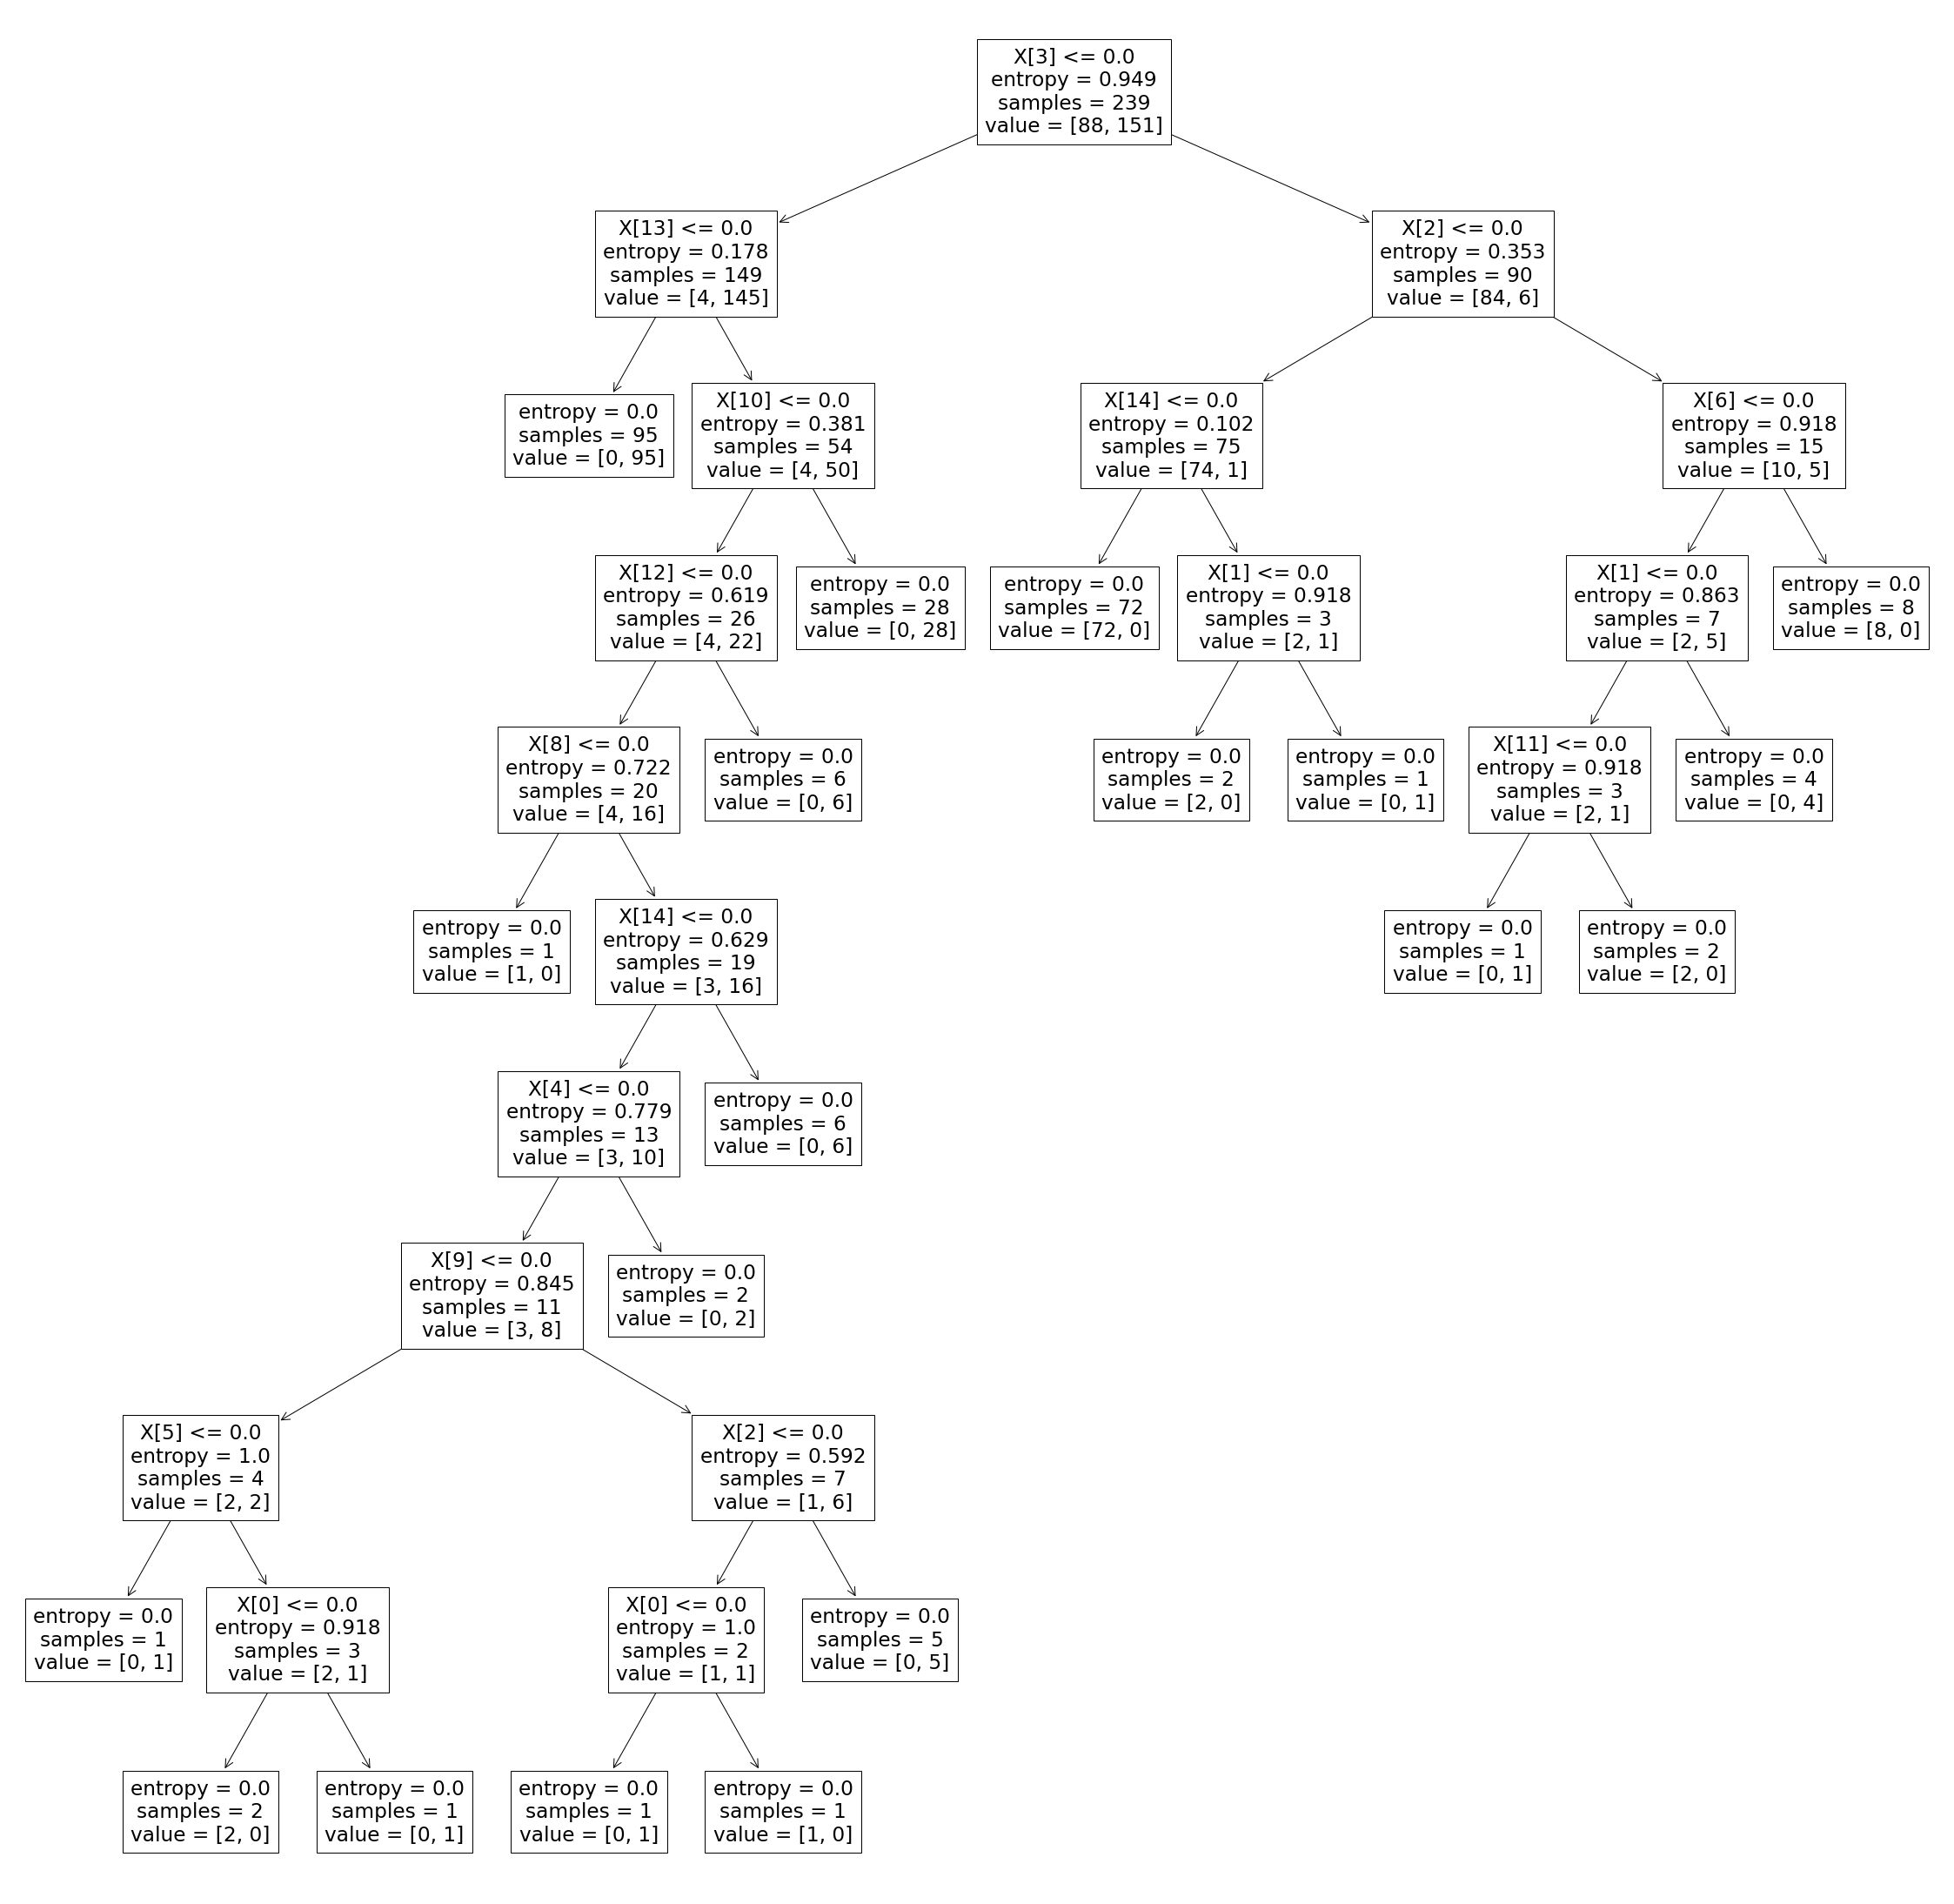

In [62]:
clf_entropy = decision_tree('./Train.xlsx', 'entropy')
print('tree for entropy')
plt.figure(1)
plt.figure(figsize=(40,40))
tree.plot_tree(clf_entropy)
plt.show()